## Import Libraries and File Reading

In [11]:
import pandas as pd

df = pd.read_csv('processed_loan_data.csv')
df.info()
df.head()
df.tail()
df.isnull().sum()
print(f'Total Duplicate : {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
 8   bucket                    10000 non-null  int64  
 9   credit_rating             10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB
Total Duplicate : 0


## Univariate Analysis

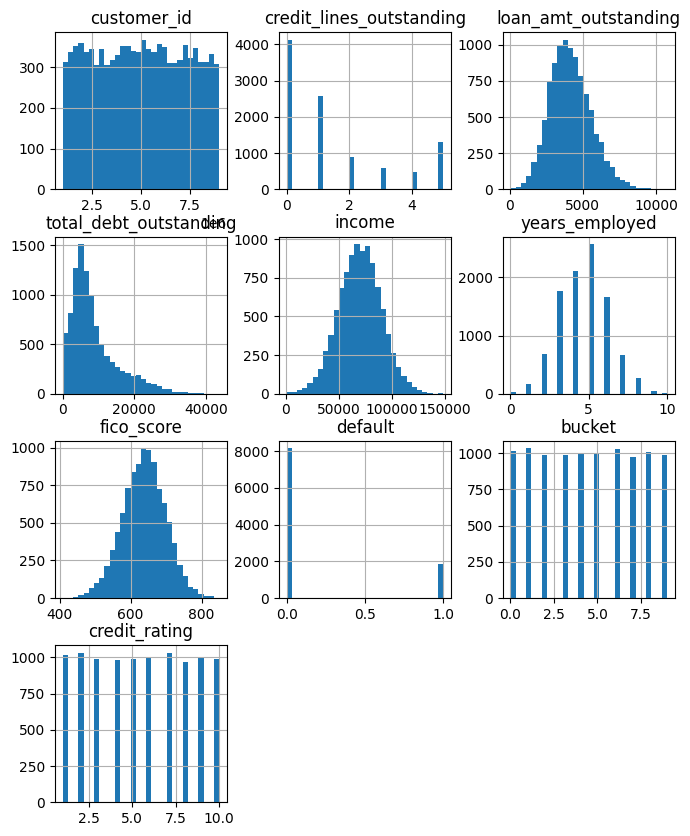

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Histogram for Numerical Feature 
df.hist(figsize=(8,10), bins=30)

# For Categorical Feature
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8,10))
    sns.countplot(x=col,data =df)
    plt.xticks(rotation=45)
    plt.show()

## For Outlier Detection

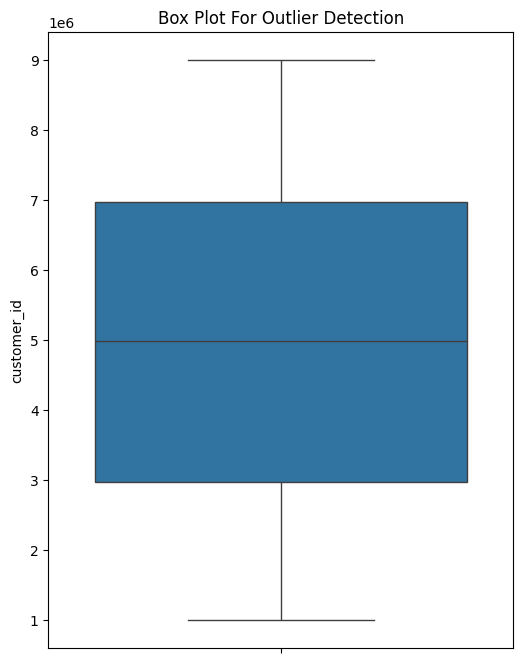

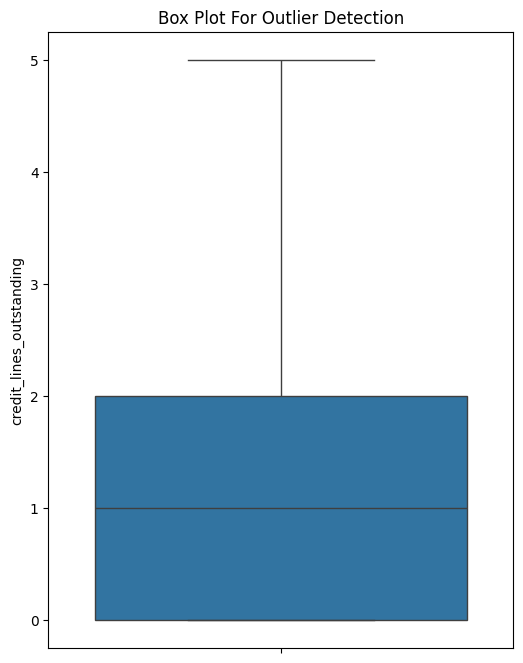

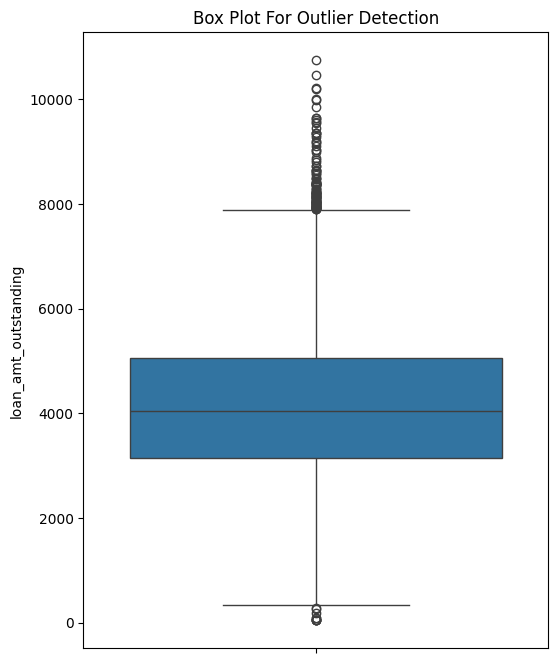

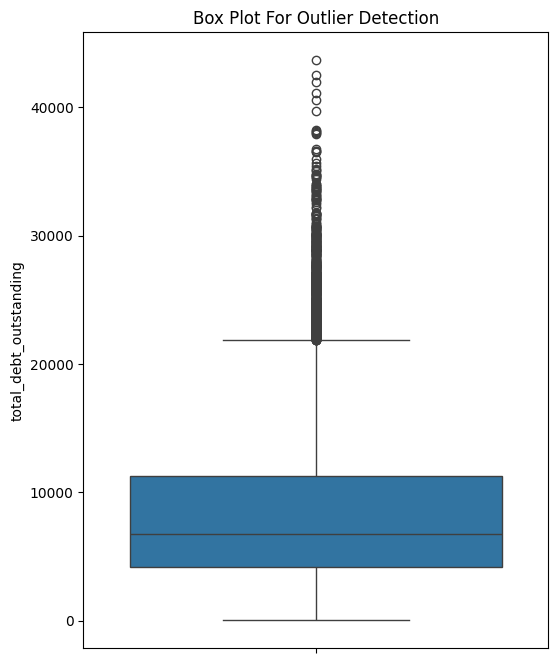

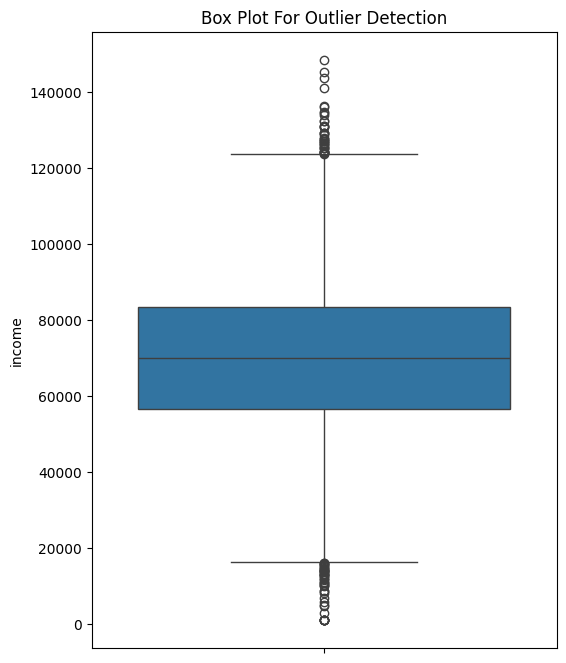

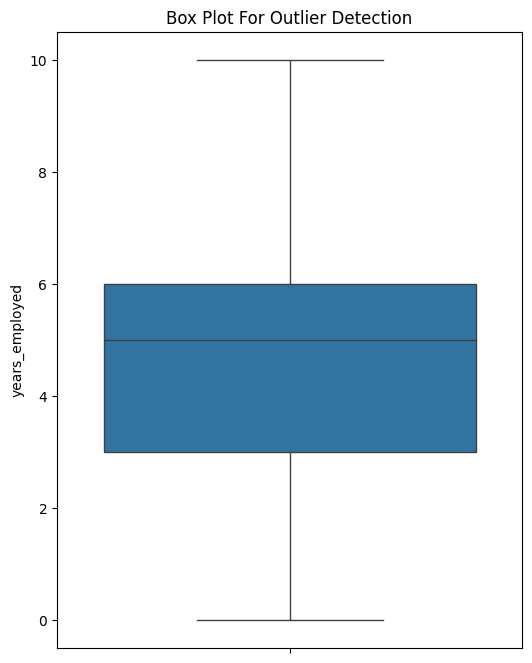

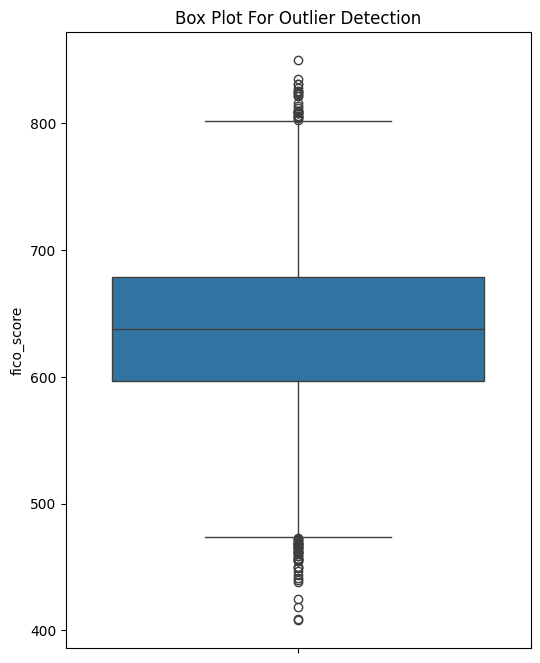

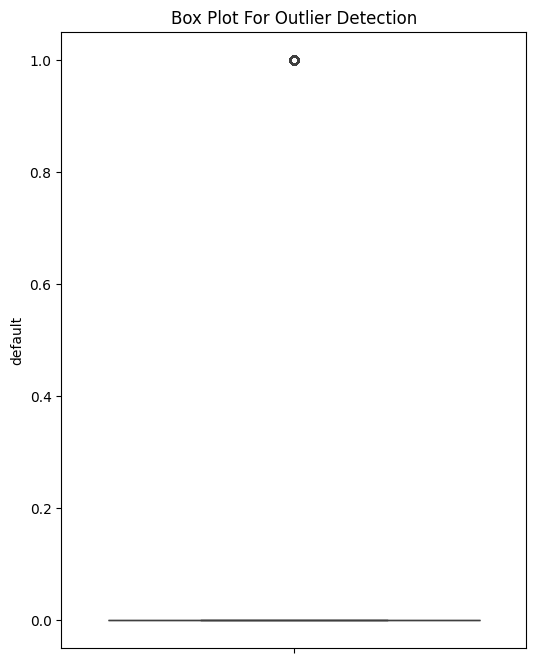

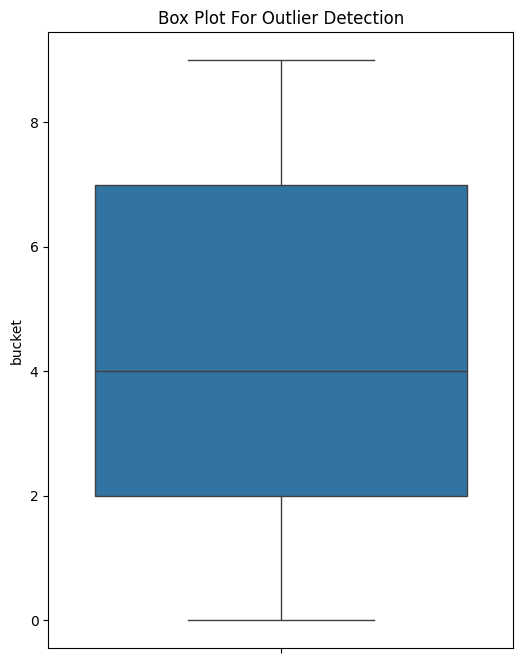

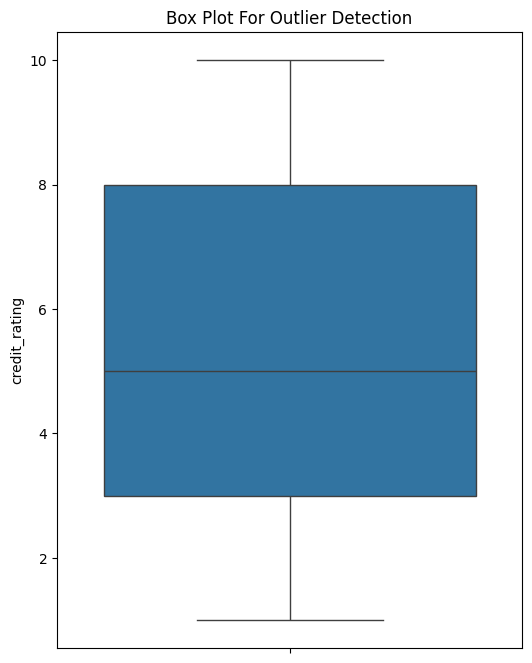

In [20]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(y=df[col])
    plt.title('Box Plot For Outlier Detection')
    plt.show()

## Pair Plot

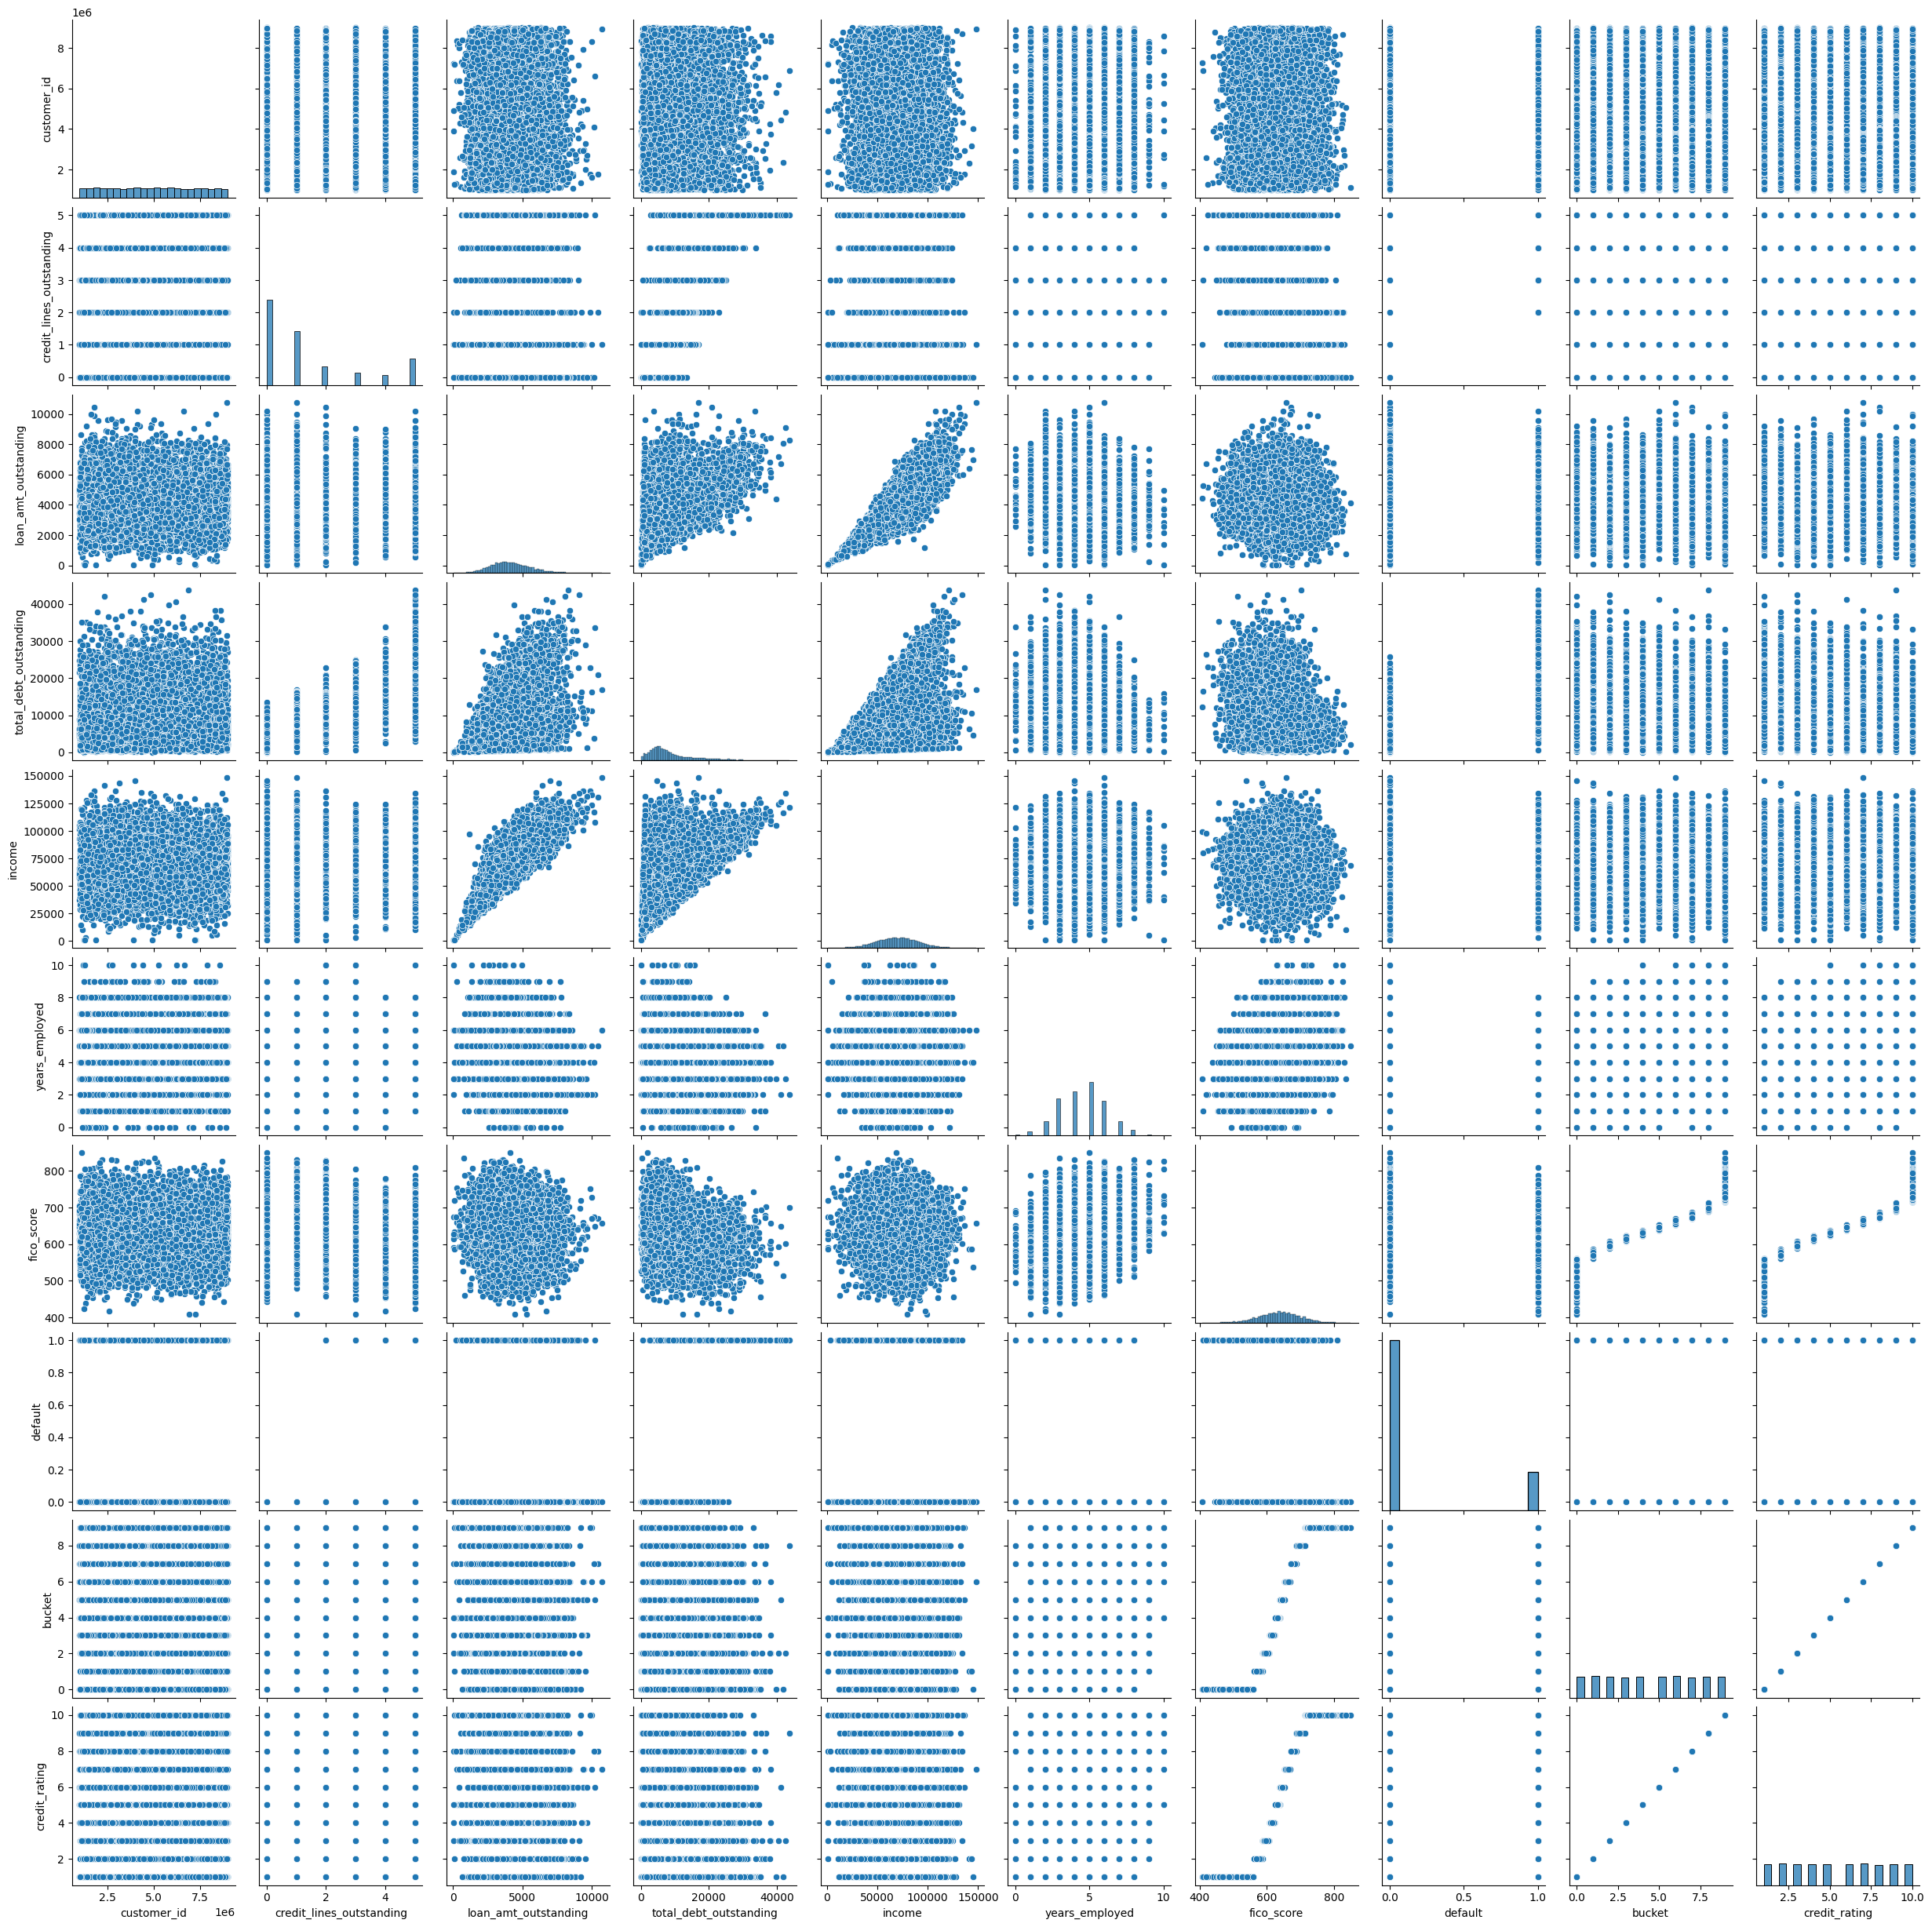

In [21]:
sns.pairplot(df)
plt.show()

## Missing Value Treatement 

In [24]:
# Filling numerical missing value 
df.fillna(df.mean(),inplace=True)

# Filling Categorical missing value 
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

## One Hot Encoding 

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

## Feature Scaling (Normalization)

In [28]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## Data Distribution 

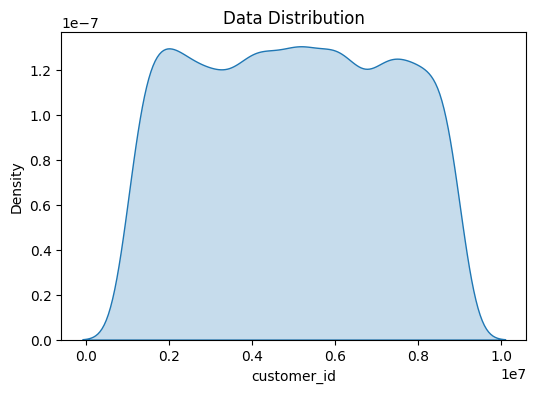

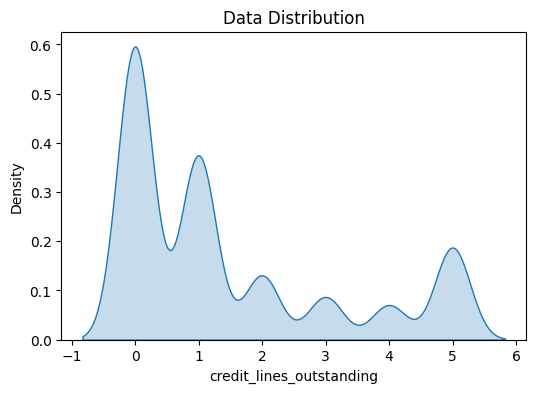

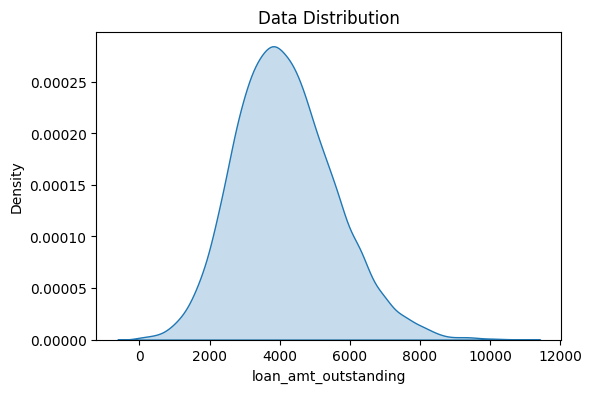

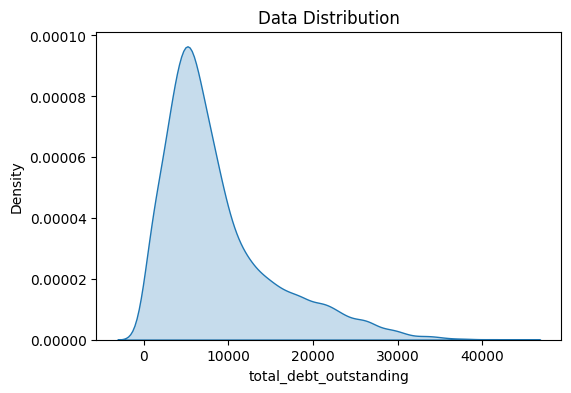

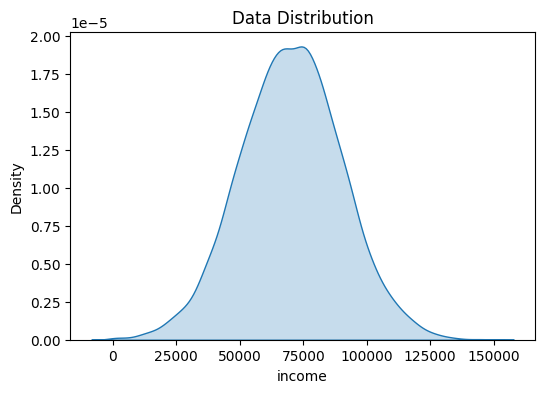

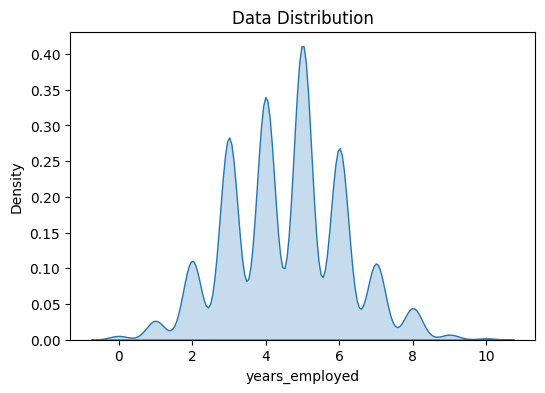

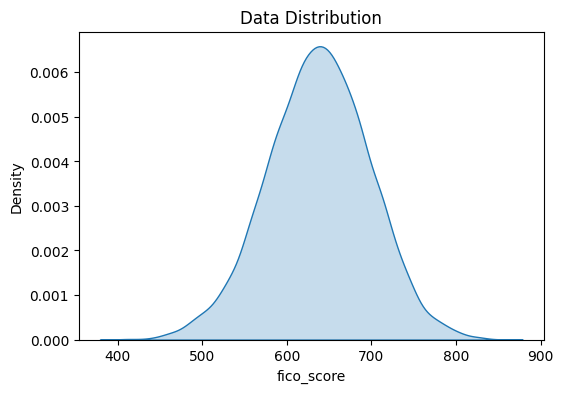

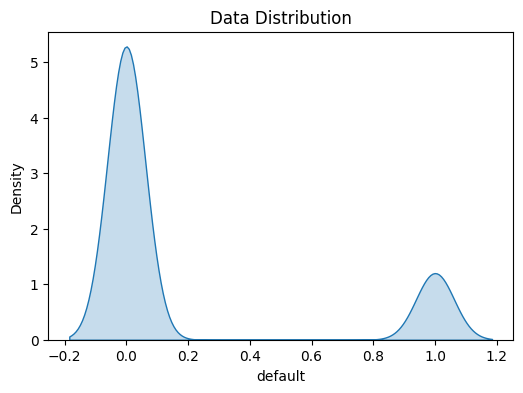

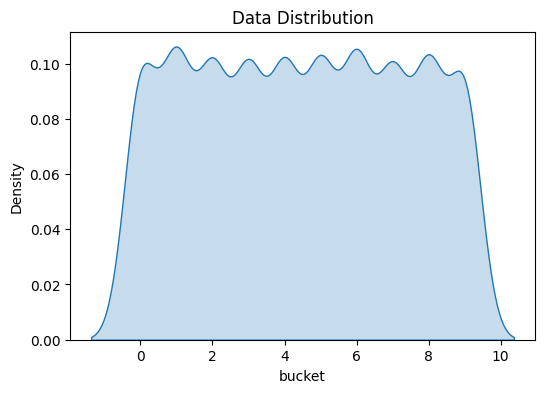

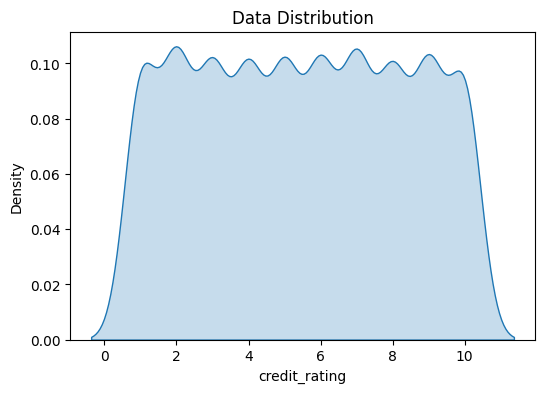

In [30]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col],fill=True)
    plt.title("Data Distribution")
    plt.show()